# IMPORTING MODULES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GET DATA

In [3]:
df=pd.read_csv(r"C:\Users\ashwi\Downloads\1. Weather Data.csv")

# READ DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


The data ha sno null Values , therefore can proceed with Data manipulation and analysis

>>Date/Time – When the weather was recorded.

>>Temp_C – Air temperature in Celsius.

>>Dew Point Temp_C – Temperature when air becomes fully humid.

>>Rel Hum_% – Humidity percentage (how moist the air is).

>>Wind Speed_km/h – How fast the wind is blowing.

>>Visibility_km – How far you can see clearly.

>>Press_kPa – Air pressure (linked to weather changes).

>>Weather – Weather condition (e.g., Clear, Cloudy, Rain).



# DATA MANIPULATION

In [5]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date'] = df['Date/Time'].dt.date
df['Time'] = df['Date/Time'].dt.time


In [6]:
# Create new features: day of the week and time of day
df['Day_of_Week'] = df['Date/Time'].dt.day_name()
df['Time_of_Day'] = df['Date/Time'].dt.hour


# DATA ANALYSIS

In [7]:
# Summary statistics for numerical columns
df.describe()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Time_of_Day
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,11.500000
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,0.000000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,5.750000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,11.500000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,17.250000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,23.000000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,6.922581


The dataset covers weather data for all of 2012 with hourly records. The average temperature is 8.8°C, ranging from -23.3°C to 33°C. Humidity averages 67%, wind speed 15 km/h, and visibility around 28 km. Pressure is fairly stable (~101 kPa). Data is evenly spread across all hours of the day.

In [8]:
# Group by Date and calculate average temperature for each day
daily_avg_temp = df.groupby('Date')['Temp_C'].mean()
daily_avg_temp

Date
2012-01-01     0.629167
2012-01-02     0.041667
2012-01-03   -14.416667
2012-01-04   -13.645833
2012-01-05    -6.750000
                ...    
2012-12-27    -5.833333
2012-12-28    -6.775000
2012-12-29   -11.345833
2012-12-30   -11.370833
2012-12-31    -5.604167
Name: Temp_C, Length: 366, dtype: float64

Daily Average Temperature 
The daily average temperature in 2012 varied significantly, from highs above 0°C in early January to lows below -14°C, like on January 3rd. This shows noticeable cold spells, especially in winter months.

In [ ]:
# Group by Date and calculate the mean for each group
daily_avg = df.groupby('Date').agg({'Temp_C': 'mean','Rel Hum_%': 'mean'})
print("Daily averages of Temperature and Humidity:\n", daily_avg.head())


Daily averages of Temperature and Humidity:
                Temp_C  Rel Hum_%
Date                            
2012-01-01   0.629167  86.125000
2012-01-02   0.041667  63.083333
2012-01-03 -14.416667  54.791667
2012-01-04 -13.645833  62.875000
2012-01-05  -6.750000  70.000000


>>On Jan 1st, the temperature was just above 0°C with high humidity (86%).

>>From Jan 3rd–5th, temperatures dropped sharply (below -6°C) while humidity varied between 55% and 70%.

>>There's a general inverse trend: as temperatures decreased, humidity also showed some fluctuations but didn’t consistently rise or fall.

In [10]:
# Calculate the correlation between Temp_C and Wind Speed
corr_temp_wind = np.corrcoef(df['Temp_C'], df['Wind Speed_km/h'])
print("Correlation between Temperature and Wind Speed:\n", corr_temp_wind)


Correlation between Temperature and Wind Speed:
 [[ 1.       -0.061876]
 [-0.061876  1.      ]]


>>The correlation value is -0.06, which is very close to 0.

>>This indicates almost no linear relationship between temperature and wind speed in your dataset — they behave largely independently.



In [11]:
# Filter data for high wind speeds
high_wind_data = df[df['Wind Speed_km/h'] > 50]
print("Data with high wind speed:\n", high_wind_data.head())


Data with high wind speed:
               Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
409 2012-01-18 01:00:00     3.7              -2.1         66               83   
410 2012-01-18 02:00:00     0.5              -4.0         72               70   
411 2012-01-18 03:00:00    -3.5              -8.2         70               57   
671 2012-01-28 23:00:00     1.2              -1.7         81               52   
672 2012-01-29 00:00:00     1.5              -5.0         62               57   

     Visibility_km  Press_kPa        Weather        Date      Time  \
409           25.0      98.36  Mostly Cloudy  2012-01-18  01:00:00   
410           25.0      98.62  Mostly Cloudy  2012-01-18  02:00:00   
411           25.0      99.00  Mostly Cloudy  2012-01-18  03:00:00   
671           16.1      99.87      Rain,Snow  2012-01-28  23:00:00   
672           25.0      99.96   Mainly Clear  2012-01-29  00:00:00   

    Day_of_Week  Time_of_Day  
409   Wednesday            1  
41

>>The highest wind speed recorded was 83 km/h on Jan 18, 2012 at 1:00 AM with cloudy weather.

>>High wind speeds often occurred during late-night or early-morning hours, mostly with cloudy or rainy conditions.

>>Even with high winds, visibility remained decent (16–25 km) and pressure was slightly lower than average

# DATA VISUALIZATION

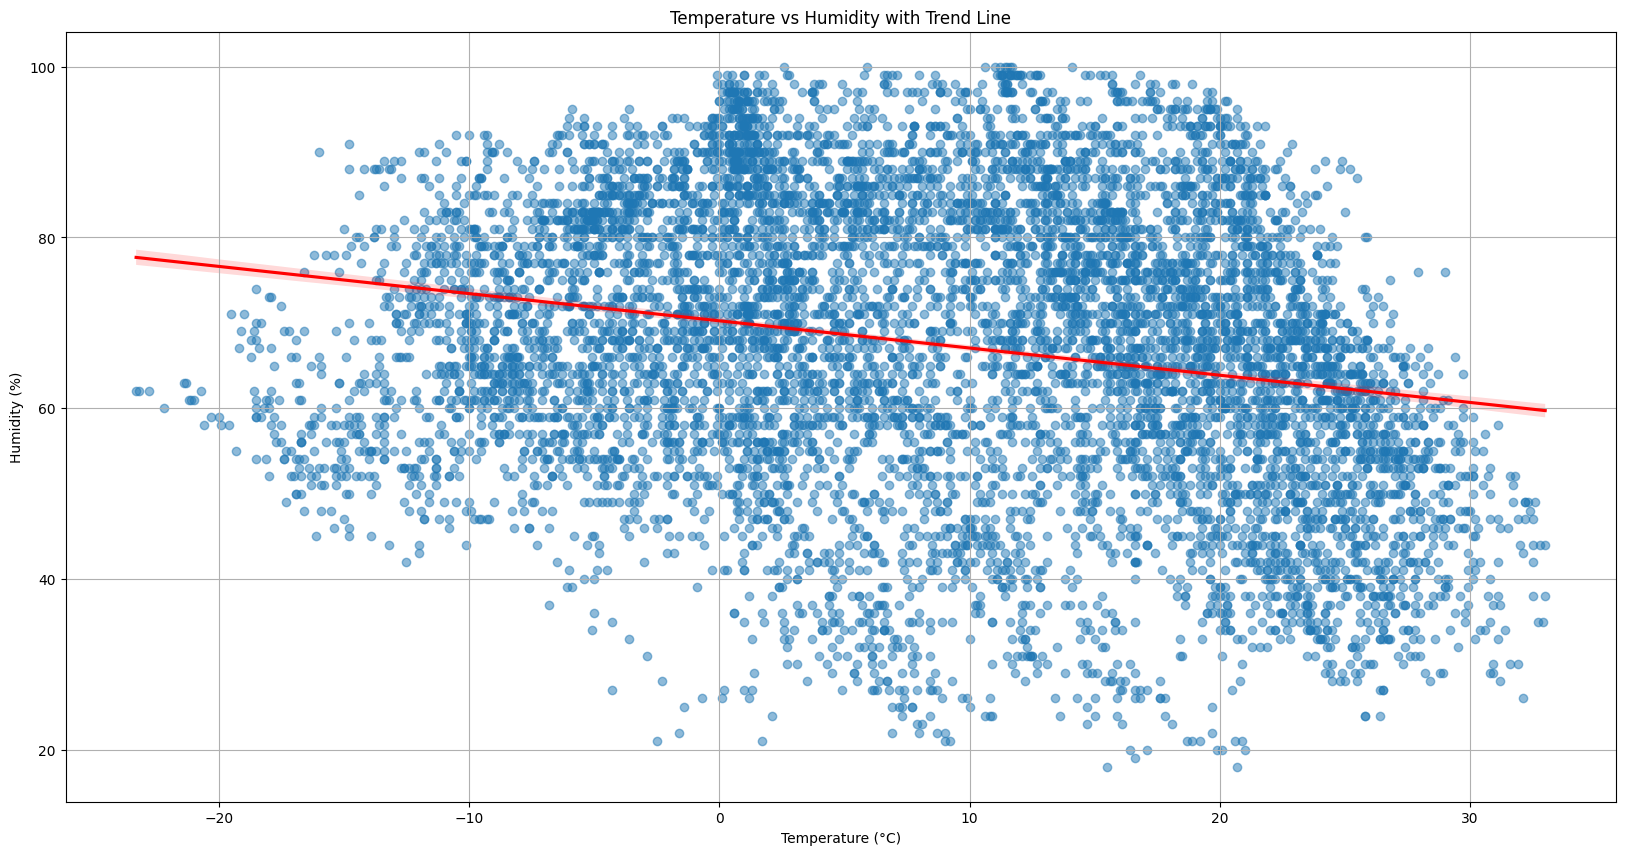

In [69]:
# Scatter plot for Temp_C vs Rel Hum_% with some limits and grid
plt.figure(figsize=(20, 10))
sns.regplot(x='Temp_C', y='Rel Hum_%', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Temperature vs Humidity with Trend Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


The regression line shows a strong negative relationship between Temperature (°C) and Relative Humidity (%). As temperature increases, humidity decreases, starting at 78% at lower temperatures and dropping to 60% at higher temperatures. This indicates that warmer air holds less moisture.

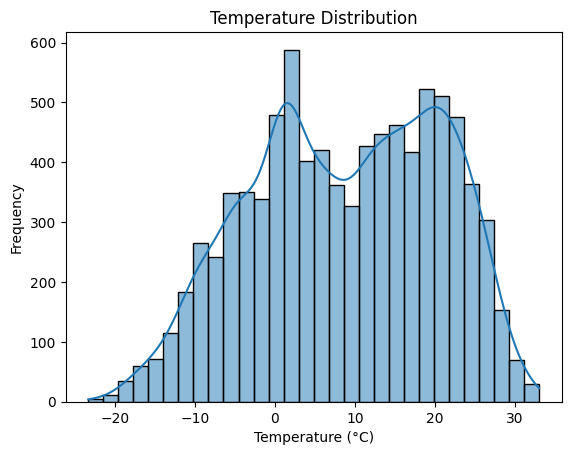

In [13]:
# Plotting a histogram for temperature distribution
sns.histplot(df['Temp_C'], kde=True, bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


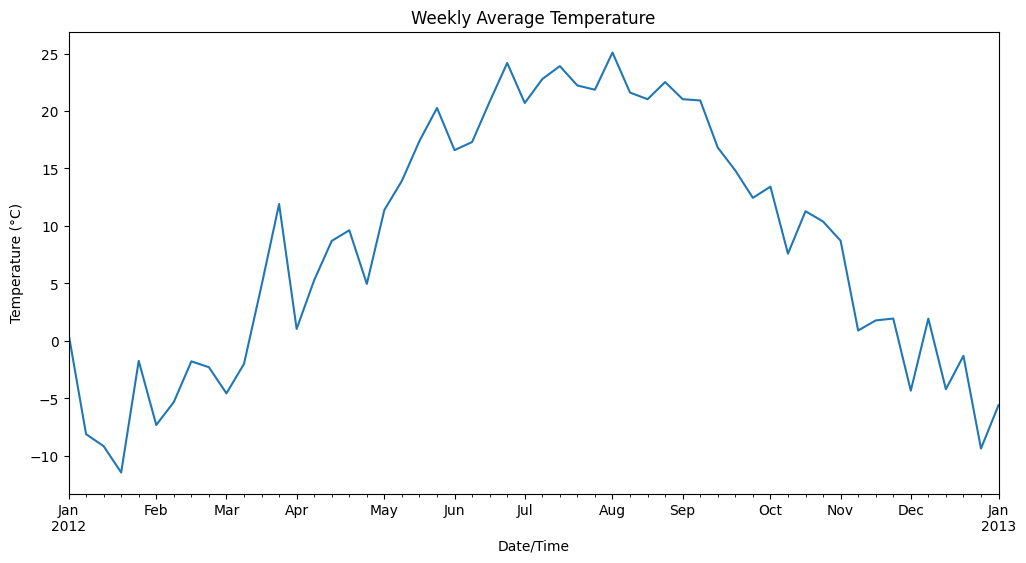

In [ ]:
# Resample by week and calculate weekly average temperature
weekly_avg_temp = df.resample('W')['Temp_C'].mean()

# Plot weekly average temperature
weekly_avg_temp.plot(figsize=(12, 6), title='Weekly Average Temperature')
plt.ylabel('Temperature (°C)')
plt.show()



>>The weekly average temperature shows significant fluctuations throughout the year.

>>Cold months (January, February, and December) have negative or low temperatures, with the lowest being around -11.47°C in January.

>>As the year progresses, temperatures gradually rise, with the warmest period around May (peaking at 20.26°C on May 27).

>>Temperature increases steadily from winter into spring, with noticeable rises starting around April.

>>The temperature trend is generally consistent with the changing seasons, showing colder temperatures in winter and warmer temperatures in summer

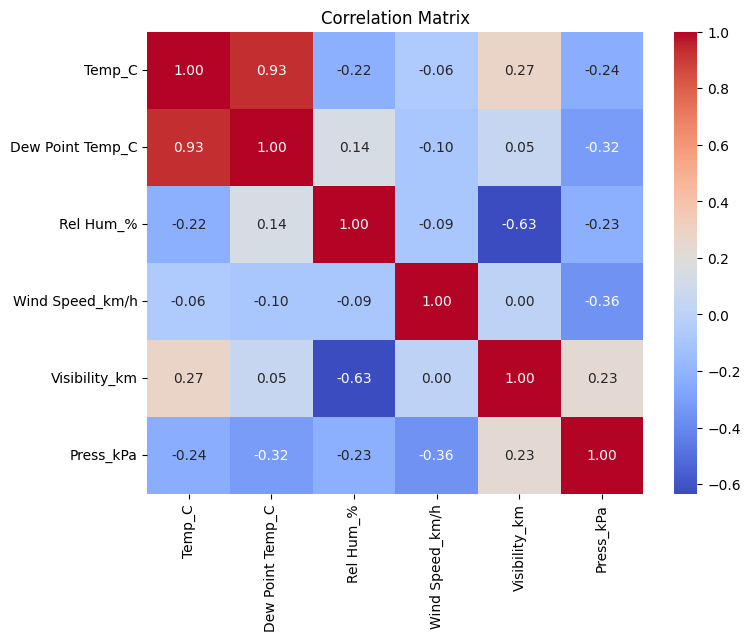

In [43]:
# Calculate correlation matrix
corr_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


>>Temperature vs Dew Point Temp: Strong positive correlation (0.93), indicating they tend to increase or decrease together.

>>Temperature vs Humidity: Negative correlation (-0.22), suggesting that as temperature rises, humidity tends to decrease slightly.

>>Wind Speed vs Temperature: Very weak negative correlation (-0.06), showing no significant relationship between wind speed and temperature.

>>Wind Speed vs Visibility: Almost no correlation (0.005), meaning wind speed doesn't impact visibility significantly.

>>Pressure vs Temperature: Negative correlation (-0.24), indicating a slight inverse relationship.



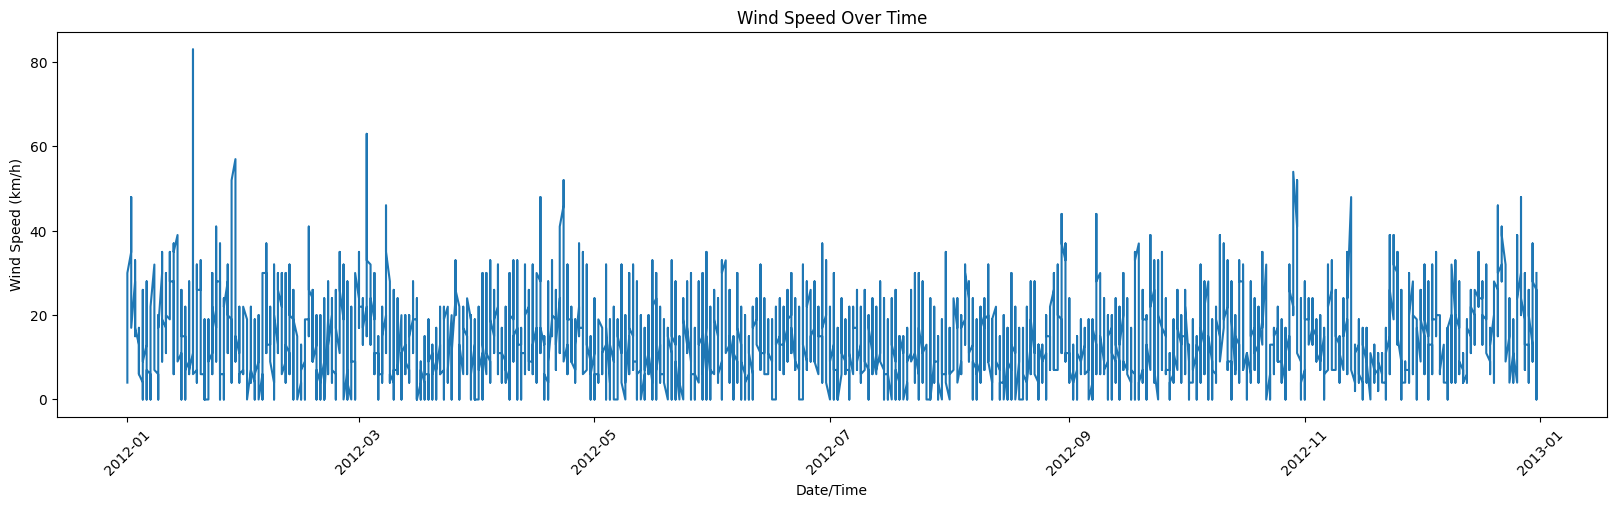

In [33]:
# Plot Wind Speed over time 
plt.figure(figsize=(20, 5))
plt.plot(df['Date'] , df['Wind Speed_km/h'])
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.show()




>>Wind speeds range from 4 km/h to 30 km/h throughout the year.

>>There is no clear trend in wind speed across the day, with values fluctuating at different hours.

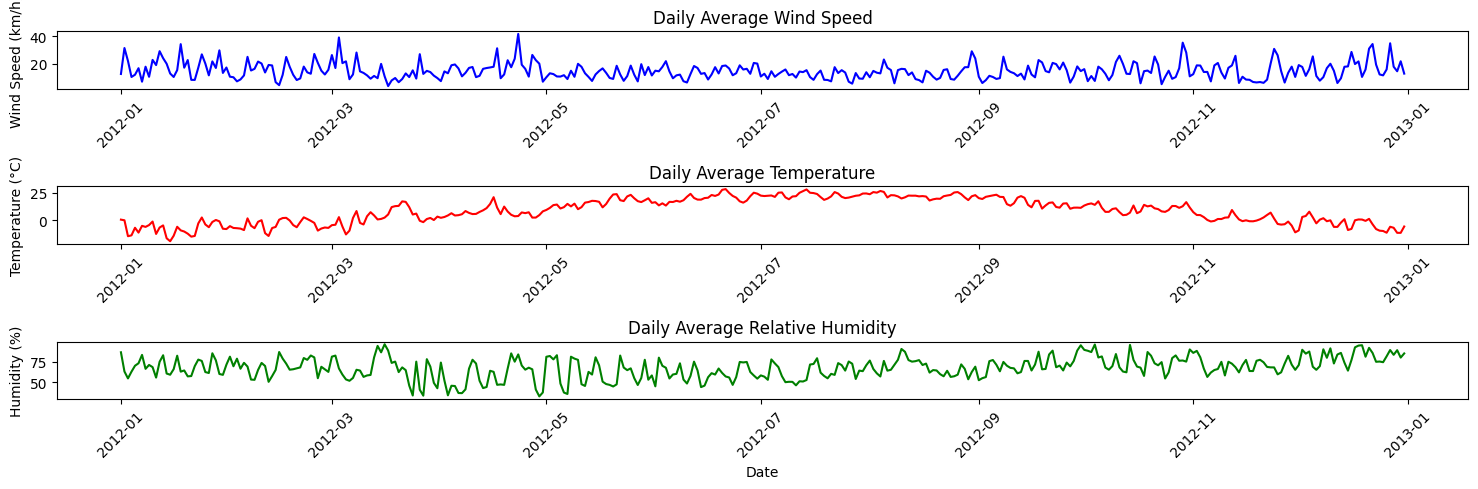

In [ ]:
# Group by date and calculate average values
daily_trend = df.groupby('Date')[['Wind Speed_km/h', 'Temp_C', 'Rel Hum_%']].mean().reset_index()


# Set figure size for all plots
plt.figure(figsize=(15, 5))

# Plot 1: Wind Speed Trend
plt.subplot(3, 1, 1)
plt.plot(daily_trend['Date'], daily_trend['Wind Speed_km/h'], color='blue')
plt.title('Daily Average Wind Speed')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)

# Plot 2: Temperature Trend
plt.subplot(3, 1, 2)
plt.plot(daily_trend['Date'], daily_trend['Temp_C'], color='red')
plt.title('Daily Average Temperature')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)

# Plot 3: Relative Humidity Trend
plt.subplot(3, 1, 3)
plt.plot(daily_trend['Date'], daily_trend['Rel Hum_%'], color='green')
plt.title('Daily Average Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


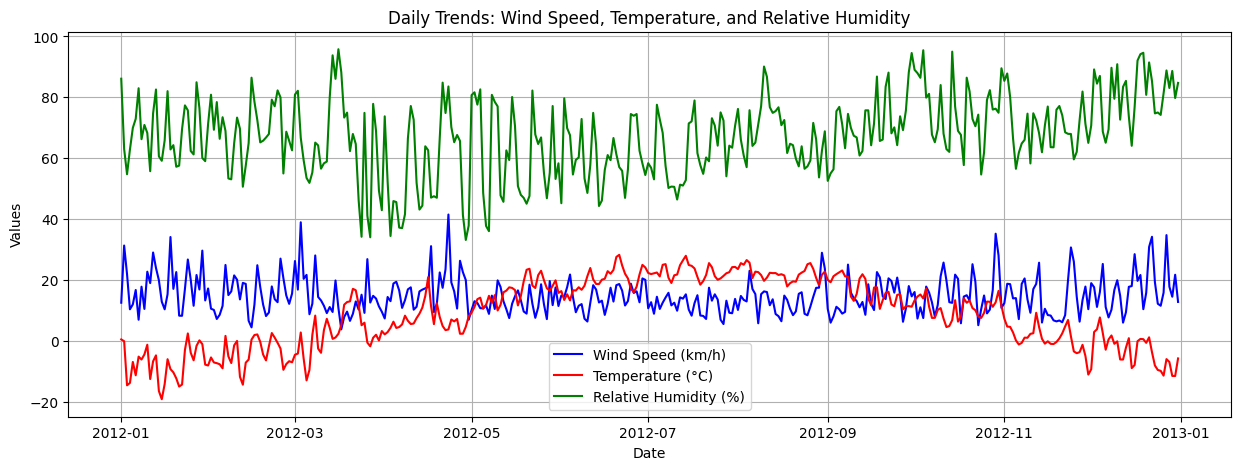

In [74]:

# Group by date and calculate average values
daily_trend = df.groupby('Date')[['Wind Speed_km/h', 'Temp_C', 'Rel Hum_%']].mean().reset_index()

plt.figure(figsize=(15, 5))
# Plot Wind Speed Trend
plt.plot(daily_trend['Date'], daily_trend['Wind Speed_km/h'], color='blue', label='Wind Speed (km/h)')
# Plot Temperature Trend
plt.plot(daily_trend['Date'], daily_trend['Temp_C'], color='red', label='Temperature (°C)')
# Plot Relative Humidity Trend
plt.plot(daily_trend['Date'], daily_trend['Rel Hum_%'], color='green', label='Relative Humidity (%)')
plt.title('Daily Trends: Wind Speed, Temperature, and Relative Humidity')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid( "minor")
plt.legend()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_5504\81144926.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


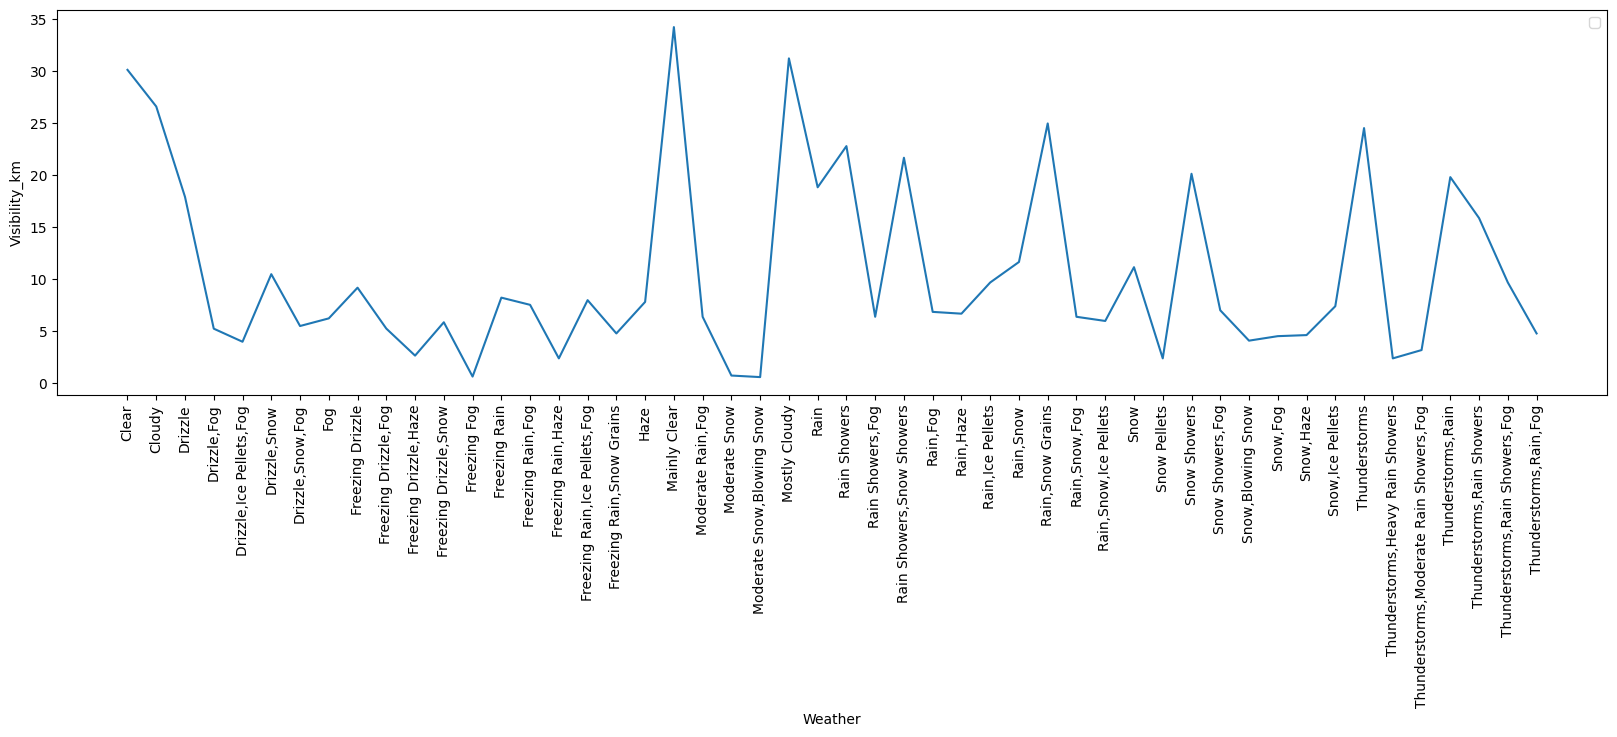

In [59]:
# Group by Weather and calculate the average Visibility_km
avg_visibility_by_weather = df.groupby('Weather')['Visibility_km'].mean()

# Convert the Series to a DataFrame
avg_visibility_by_weather = avg_visibility_by_weather.reset_index()

plt.figure(figsize=(20,5))
sns.lineplot(data=avg_visibility_by_weather, x='Weather', y='Visibility_km')
plt.legend()
plt.xticks(rotation=90)  
plt.show()


>>Clear weather has the highest average visibility at approximately 30.15 km.

>>Fog significantly reduces visibility, with an average of 6.25 km, and combinations like Drizzle,Fog and Snow,Fog further decrease visibility to around 5.5 km.

>>Heavy weather conditions such as Drizzle, Ice Pellets, Fog and Thunderstorms result in lower visibility, averaging around 4 km.

>>Moderate weather conditions like Rain and Cloudy typically have higher visibility, ranging from 18.85 km to 26.63 km.

>>Snow and related conditions (such as Snow, Blowing Snow and Snow Showers) tend to have moderate visibility, averaging around 7-11 km.

# Final Observations:

>>The temperature and humidity trends exhibit a somewhat inverse relationship: when temperature rises, humidity tends to decrease, and vice versa.

>>Wind speed does not seem to follow a direct pattern with temperature or humidity, suggesting that it may be influenced by other weather factors like storms or pressure systems.

>>Wind Speed Trend  generally fluctuates with a few peak values, indicating variability in the weather. Periods of higher wind speeds might correlate with stormier weather or changes in atmospheric conditions.

>>Temperature Trend There is a clear pattern in temperature, with fluctuations showing typical seasonal behavior. The temperature is lower during the winter months, with a noticeable increase during spring and summer, reflecting natural seasonal changes.

>>Relative Humidity shows a fairly consistent pattern but tends to be higher during cooler periods, as cooler air holds less moisture. There are occasional spikes in humidity, which could indicate periods of precipitation or changes in local weather conditions.